# Interactive Data Visualization
##### (C) 2023-2025 Timothy James Becker: [revision 1.0](),  [GPLv3 license](https://www.gnu.org/licenses/gpl-3.0.html) 

#### <u>Data Cleaning</u>

Interactive data visualization requires that we load data, map it to our pixel/color spaces and meet tight deadlines for interaction timing that a user may trigger, which means there should be some optimization of these workflows.  Additionally, we may be given data that is in an unkept or low-organizational state in which it will not be readily visualized. In this section we will look at data that would be difficult to visualize and we will employ strategies that will allow us to proceed with our prior visualization strategies. We could do some of this cleaning in the client webapp that the user would run, but we can greatly improve the interactive components of the visualization by filtering it before hand.  In general, we must work through all of our data and set a criterion for filtering unwanted rows of data and picking columns using the selection and projection operations that were discussed previously in section [04_Loading_Data.ipynb].  But this will only work for some of the data that is presented in this section where we will see harder data that does not meet normalization standards for databases. We will look a file that has a variable number of arguments in a single column which is known as a multi-value field. These types ofcolumns are problematic but often contain the most interesting and important information for visualization!

<img src="figures/data_cleaning_overview.png" alt="data_cleaning_overview" width="700px">

#### <u>Selection and Projection of NAHNES data (filtering rows and columns)</u>

We will start our work looking at a very well used and difficult dataset called [NHANES](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). The purpose of this National Health and Nutrition Examination Survey is to examine health risks such as heart disease and its connection to nutrition.  One interesting thing about this is that is has occurred every year for many years making more involved time series analysis possible to investigate nutrition and health changes over time. First we will load the compressed data into python directly to explore te data:

In [49]:
#[Load and Process the Dataset: NHANES-10000]
from matplotlib import pyplot as plt
import numpy as np
import gzip
with gzip.GzipFile('data/NHANES.csv.gz','rb') as f:
    #gp from raw data into filtered and clean data--------------------------------------------------
    raw = [row.decode('utf-8').replace('\n','').replace('\r','').split(',') for row in f.readlines()]
    header,data = raw[0],raw[1:]
print(header)
print(len(data))

['SurveyYr', 'ID', 'Gender', 'Age', 'AgeDecade', 'AgeMonths', 'Race1', 'Race3', 'Education', 'MaritalStatus', 'HHIncome', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'Diabetes', 'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad', 'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby', 'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays', 'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild', 'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100', 'Smoke100n', 'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij', 'AgeRegMarij', 'HardDrugs', 'SexEver', 'SexAge', 'SexNumPartnLife', 'SexNumPartYear', 'SameSex', 'SexOrientation']
10000


We will use a helper data structured (dict) to allow us to work with the name of the column (this will resolve to the index of the column in each row of data)

In [3]:
idx = {header[i]:i for i in range(len(header))}

Then we explore the data domain for each column that we are interested in, here we will check out "Education":

In [5]:
ed  = sorted(set([row[idx['Education']] for row in data]))
ed

['8thGrade', '9_11thGrade', 'CollegeGrad', 'HighSchool', 'NA', 'SomeCollege']

Notice how the NA value is present which means "Not Applicable". This value in the NHANES is generally put in a column when the answer is not filled out as opposed to the literal meaning of "Not Applicable" and so we treat it as a missing value that can be filtered out. We will explore some more columns before some exploratory data analysis is concluded:

In [6]:
hd  = sorted(set([row[idx['HardDrugs']] for row in data]))
hd

['NA', 'No', 'Yes']

In [7]:
ag = sorted(set([row[idx['Age']] for row in data]))
ag

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '9']

By exploring the domain (observed values) of specific columns we can see that "Education" is an ordinal value that could be mapped to the number of years in education (IE education level).  We also see that "Hard Drugs" is a yes or no (IE Boolean) value and that "Age" is in years.  We can therefore filter rows of data based on these types of data and then proceed to clean the NHANES data for use in our visualization webapp.



(array([1130., 1097., 1067., 1130., 1035., 1110., 1086.,  929.,  662.,
         754.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

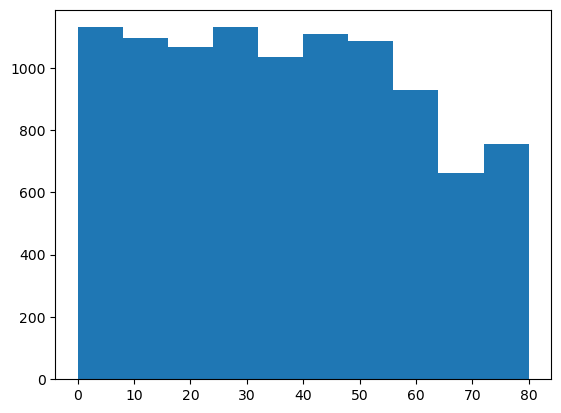

In [10]:
#plot the amount of each value here...
plt.hist([int(row[idx['Age']]) for row in data])

(array([1065.,    0.,    0.,    0.,    0., 4235.,    0.,    0.,    0.,
        4700.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

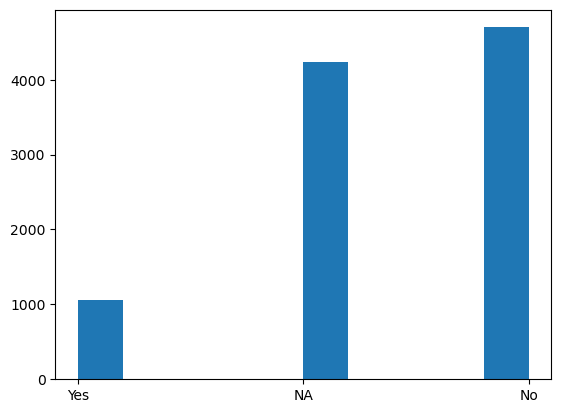

In [11]:
plt.hist([row[idx['HardDrugs']] for row in data])

(array([2098.,    0., 2779.,    0.,  451.,    0., 1517.,    0., 2267.,
         888.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

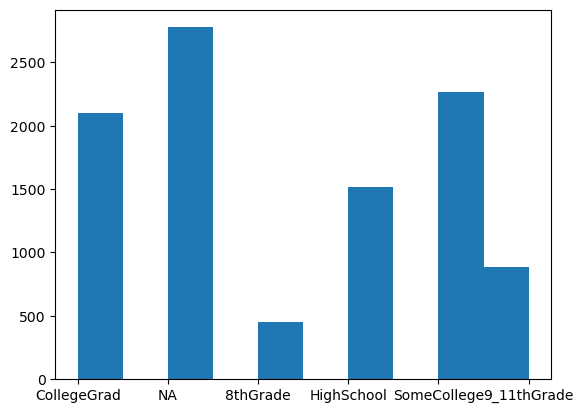

In [13]:
plt.hist([row[idx['Education']] for row in data])

Now if we want to set up a scatter plot to see how BMI and Diabetes are associated, we would check those two columns out using the above plots and then will filter out any NAs for those rows:

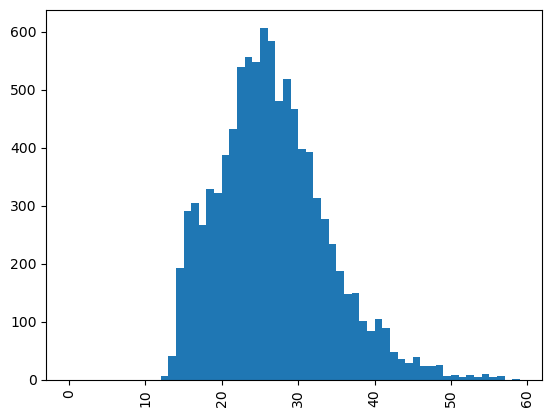

In [23]:
bmi = []
for row in data:
 if row[idx['BMI']]!='NA': bmi += [float(row[idx['BMI']])] #filter out the NAs
plt.hist(bmi,bins=range(0,60,1)) #explicitly set the x-axis to be 0,1,2,...,60 BMI
plt.xticks(rotation='vertical')  #rotate the x-labels so we can see the values better
plt.show()                       #show the plot now

(array([9098.,    0.,    0.,    0.,    0.,  760.,    0.,    0.,    0.,
         142.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

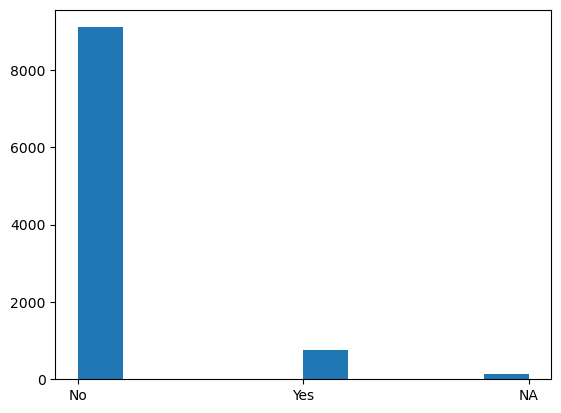

In [24]:
plt.hist([row[idx['Diabetes']] for row in data])

Now we will pick all of these columns, filtering out any rows with NAs and then make a new file for our visualization.

In [34]:
clean = []
cols = ['Education','HardDrugs','Age','Diabetes','BMI']
for row in data:
    new = []
    for col in cols:
        if row[idx[col]]!='NA': new += [row[idx[col]]]
    if len(new)==len(cols): clean += [new]
print(len(data)*len(header),len(clean)*len(cols))

750000 27475


In [35]:
clean[0]

['CollegeGrad', 'Yes', '28', 'No', '23.3']

So we have made our original file that had 10000 rows with 75 columns into a 5495 row table with 5 columns which is 75K elements to load and process versus our new 27K element file (roughly a speed up of 3 for data loading!). Lets make sure to save our new CSV file.

In [46]:
s = ','.join(cols)+'\n'+'\n'.join([','.join(row) for row in clean])+'\n'
with open('data/nhanes.cleaned.csv','w') as f:
    f.writelines(s)

In [115]:
clean[0:10]

[['CollegeGrad', 'Yes', '28', 'No', '23.3'],
 ['HighSchool', 'Yes', '22', 'No', '22.74'],
 ['8thGrade', 'No', '39', 'No', '27.46'],
 ['SomeCollege', 'No', '61', 'Yes', '22.03'],
 ['8thGrade', 'No', '40', 'No', '28.07'],
 ['HighSchool', 'No', '20', 'No', '25.87'],
 ['SomeCollege', 'No', '56', 'No', '37.19'],
 ['CollegeGrad', 'No', '62', 'Yes', '42.07'],
 ['CollegeGrad', 'No', '39', 'No', '25.21'],
 ['HighSchool', 'No', '25', 'No', '32.02']]

In [105]:
#heatmap on Education versus BMI
edu = {"8thGrade":0,"9_11thGrade":1,"HighSchool":2,"SomeCollege":3,"CollegeGrad":4}
bmi = [10,20,30,40,50]
ys  = []
for e in clean:
    ys += [[edu[e[0]],float(e[4])]]
ys = np.asarray(ys)
hs = np.zeros((len(edu),len(bmi)),dtype=int)
for y in ys:
    for e in edu:
        if y[0]==edu[e]:
              for i in range(len(bmi)-1):
                  if y[1]>=bmi[i] and y[1]<bmi[i+1]:
                      hs[edu[e],i] += 1
print(ys)
print(hs)

[[ 4.   23.3 ]
 [ 2.   22.74]
 [ 0.   27.46]
 ...
 [ 1.   24.6 ]
 [ 3.   36.7 ]
 [ 3.   29.2 ]]
[[   1  130   74   20    0]
 [  29  353  184   47    0]
 [  43  634  370   70    0]
 [  78  978  599  123    0]
 [  88 1131  430   64    0]]


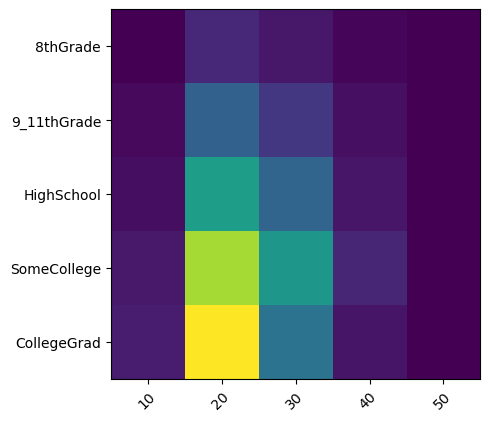

In [109]:
fig,ax = plt.subplots()
im = ax.imshow(hs)

ax.set_xticks(range(len(bmi)), labels=[str(b) for b in bmi],
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(edu)), labels=["8thGrade","9_11thGrade","HighSchool","SomeCollege","CollegeGrad"])
plt.show()

#### Exercises
#### [1] Using the course d3 webapp template put together a plot of Diabetes versus Education (scatter ot heatmap)
#### [2] Using the course d3 webapp template put together a plot of Diabetes versus Age (scatter ot heatmap)
#### [3] Using the course d3 webapp template put together a plot of Diabetes versus BMI (scatter ot heatmap)

#### <u>Data Mining problematic multi-valued ClinVar data</u>
Now we will move on to cleaning even more difficult data columns from the [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/intro/) where they have multiple values of a vairable length inside what should be a single column! We will emply spliting, searching and agregating to gather the important information inside a multi-value column called INFO in the clinvar.vcf.gz file. First we will read in the raw data and get the header lines using similair code as above:

In [50]:
with gzip.GzipFile('data/clinvar.vcf.gz','rb') as f:
    #gp from raw data into filtered and clean data--------------------------------------------------
    raw = [row.decode('utf-8').replace('\n','').replace('\r','').split('\t') for row in f.readlines()]
    header,data,D = raw[0],raw[1:],[]
print(header)
print(len(data))

['##fileformat=VCFv4.1']
675884


Notice how the header didn't work? That because this is not a nice TSV file but has a special encoding and format as described in the [VCF4.1 specification](http://samtools.github.io/hts-specs/VCFv4.1.pdf). it turns out we have to skip past every line that starts with "#" and gather our header line when it starts with "#CHROM":

In [59]:
with gzip.GzipFile('data/clinvar.vcf.gz','rb') as f:
    #gp from raw data into filtered and clean data--------------------------------------------------
    raw = [row.decode('utf-8').replace('\n','').replace('\r','').split('\t') for row in f.readlines()]
    data,header = [],[]
    for row in raw:
        if row[0].startswith('#'): header += [row]
        else: data += [row]
print(header[-1])
print(data[0])
print(len(data))

['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']
['1', '930188', '846933', 'G', 'A', '.', '.', 'ALLELEID=824438;CLNDISDB=MedGen:CN517202;CLNDN=not_provided;CLNHGVS=NC_000001.11:g.930188G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SAMD11:148398;MC=SO:0001583|missense_variant;ORIGIN=1']
675857


In [61]:
idx = {header[-1][i].replace('#',''):i for i in range(len(header[-1]))}
idx

{'CHROM': 0,
 'POS': 1,
 'ID': 2,
 'REF': 3,
 'ALT': 4,
 'QUAL': 5,
 'FILTER': 6,
 'INFO': 7}

Lets take a look at our multi-valued field called INFO:

In [62]:
data[0][idx['INFO']]

'ALLELEID=824438;CLNDISDB=MedGen:CN517202;CLNDN=not_provided;CLNHGVS=NC_000001.11:g.930188G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SAMD11:148398;MC=SO:0001583|missense_variant;ORIGIN=1'

Here the INFO field has multiple values which are separated by the ";" so we will first use that:

In [110]:
data[0][idx['INFO']].split(';')

['ALLELEID=824438',
 'CLNDISDB=MedGen:CN517202',
 'CLNDN=not_provided',
 'CLNHGVS=NC_000001.11:g.930188G>A',
 'CLNREVSTAT=criteria_provided,_single_submitter',
 'CLNSIG=Uncertain_significance',
 'CLNVC=single_nucleotide_variant',
 'CLNVCSO=SO:0001483',
 'GENEINFO=SAMD11:148398',
 'MC=SO:0001583|missense_variant',
 'ORIGIN=1']

In [117]:
#Look at all the possible significance catagories...
status = sorted(set([e[idx['INFO']].split('CLNSIG=')[-1].split(';')[0] for e in data]))
sig = []
for e in data:
    if e[idx['INFO']].find('CLNSIG=')>-1:
        sig += [e]
status = sorted(set([e[idx['INFO']].split('CLNSIG=')[-1].split(';')[0] for e in sig]))
status[30:40]

['Pathogenic,_association',
 'Pathogenic,_association,_protective',
 'Pathogenic,_drug_response',
 'Pathogenic,_drug_response,_other',
 'Pathogenic,_other',
 'Pathogenic,_protective',
 'Pathogenic,_risk_factor',
 'Pathogenic/Likely_pathogenic',
 'Pathogenic/Likely_pathogenic,_drug_response',
 'Pathogenic/Likely_pathogenic,_other']

Lets now select only the rows of data that are Pathogenic and we will pick the chrom, pos, ref and alt fields.

In [132]:
clean = []
for e in data:
    if e[idx['INFO']].split('CLNSIG=')[-1].split(';')[0].split(',')[0]=='Pathogenic':
        if e[idx['INFO']].find('GENEINFO=')>-1:
            gene = e[idx['INFO']].split('GENEINFO=')[-1].split(';')[0].split(',')[0].split(':')[0]
            clean += [['chr'+e[idx['CHROM']],e[idx['POS']],e[idx['REF']],e[idx['ALT']],gene]]
print(len(data),len(clean))

675857 74420


In [133]:
clean[0:5]

[['chr1', '1014143', 'C', 'T', 'ISG15'],
 ['chr1', '1014316', 'C', 'CG', 'ISG15'],
 ['chr1', '1014359', 'G', 'T', 'ISG15'],
 ['chr1', '1022225', 'G', 'A', 'AGRN'],
 ['chr1', '1022313', 'A', 'T', 'AGRN']]

Now we can write this filtered and cleaned set of data to disk for visualization

In [135]:
s = '\t'.join(['CHROM','POS','REF','ALT','GENE'])+'\n'+'\n'.join(['\t'.join(row) for row in clean])+'\n'
with open('data/clinvar.cleaned.tsv','w') as f:
    f.writelines(s)

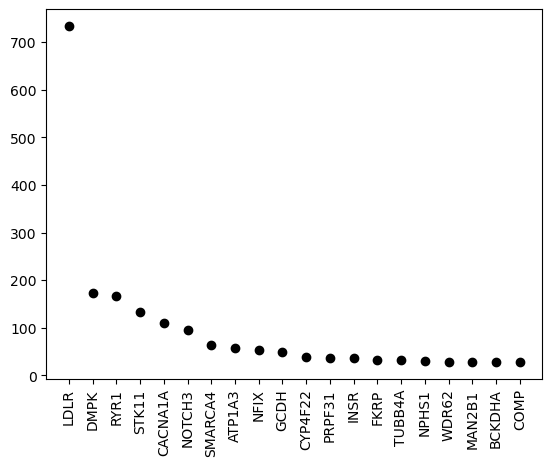

In [175]:
#genes are unique symbols like LDLR and can occur multiple times in clinvar db
genes = {}
for e in clean:
    if e[0]=='chr19':
        if e[4] in genes: genes[e[4]] += 1.0
        else:             genes[e[4]]  = 1.0
gs = [[g,genes[g]] for g in sorted(genes)]
gs = sorted(gs,key=lambda x: x[1])[::-1][:20] #grab the top 20 frequent genes
plt.scatter([e[0] for e in gs],[e[1] for e in gs],c='black')
plt.xticks(rotation='vertical')  #rotate the x-labels so we can see the values better
plt.show()  

#### <u>Normalization/Standardization</u>

[Normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) is the process of taking an observation set and converting it into something like a frequency or probabilty so that the results can be compared against a second or subsequent sample. In our complex Clinvar example above we have rows that correspond to different human chromosomes that are not of uniform length. Therefore, if we wanted to make assumptions about events they would have sever bias. Very simply we can take the number of observations $n$ and divide our data by that normalizing factor in order to then have something like the frequency: $\frac{X}{n}$. Let’s try to calculate the number of events per chromosome first and then we will normalize the results. There are many other forms of normalization that can be used depending on the quality of the data's probability distribution function. Standardization is a type of normalization that will use the statistical moments (mean and standard deviation) to center and scale the data to one unit of standard deviation: $\frac{X-\mu}{\sigma}$. We will do this part in python but it can easily be done inside the webapp client given that we have already produced much smaller and more efficient cleaned data going into this process.


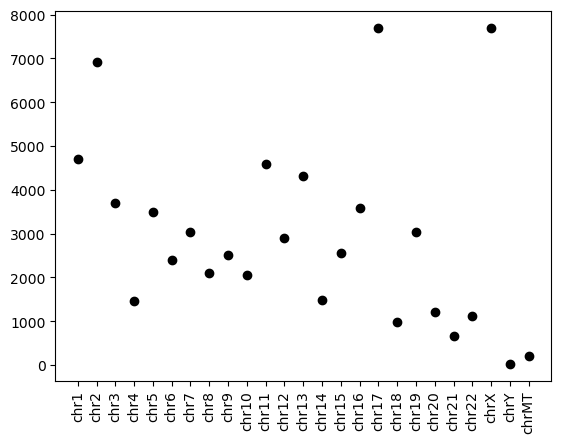

In [176]:
#raw visualization.....................................................
counts = {}
for row in clean:
    chrom,pos,ref,alt,gene = row
    if chrom in counts: counts[chrom] += 1
    else:               counts[chrom]  = 1
ys,xs = [chrom for chrom in counts],[counts[chrom] for chrom in counts]
plt.scatter(ys,xs,c='black')
plt.xticks(rotation='vertical')
plt.show()

But one important factor in our visualization is the fact that the chromosomes are of different length with chromosome 1 being much larger than chromosome 13, so if we normalize our visualization might become more informative:

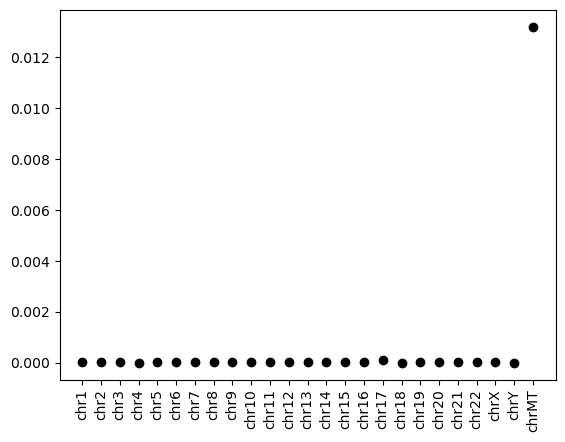

In [178]:
counts,poss = {},{} #keep track of the maximal position in each chromosome (IE no prior knowledge)
for row in clean:
    chrom,pos,ref,alt,gene = row
    if chrom in counts: 
        counts[chrom] += 1
        poss[chrom] = max(poss[chrom],int(pos))
    else:               
        counts[chrom]  = 1
        poss[chrom] = int(pos)
#normalize them now....
for chrom in counts:
    counts[chrom] = counts[chrom]/poss[chrom]
ys,xs = [chrom for chrom in counts],[counts[chrom] for chrom in counts]
plt.scatter(ys,xs,c='black')
plt.xticks(rotation='vertical')
plt.show()

What is going on with chrMT then?  That is not really a traditional chromosome but one that is called [mitochondrial DNA](https://en.wikipedia.org/wiki/Mitochondrial_DNA). In humans (the clinvar data) the chrMT is inherited from the maternal line which would accumulate genetic disease if there wasn't abiological function that prevented that (mutational amplification) so that this region has vastly more variation events (rows of data) for its size than any other chromosome. Lets remove that one since it doesn't seem to follow the same rules as the others.

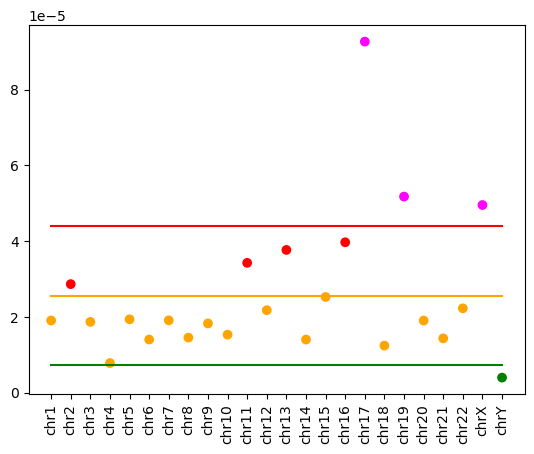

In [180]:
counts,poss = {},{} #keep track of the maximal position in each chromosome (IE no prior knowledge)
for row in clean:
    chrom,pos,ref,alt,gene = row
    if chrom!='chrMT': #filter out the crazy chrMT
        if chrom in counts: 
            counts[chrom] += 1
            poss[chrom] = max(poss[chrom],int(pos))
        else:               
            counts[chrom]  = 1
            poss[chrom] = int(pos)
#normalize them now....
for chrom in counts:
    counts[chrom] = counts[chrom]/poss[chrom]
ys,xs = [chrom for chrom in counts],[counts[chrom] for chrom in counts]
cs = []
mean = np.mean(xs)
std  = np.std(xs)
for x in xs:
    if x<= mean-std:           cs += ['green']
    if x>mean-std and x<=mean: cs += ['orange']
    if x>mean and x<=mean+std: cs += ['red']
    if x>mean+std:             cs += ['magenta']
plt.scatter(ys,xs,c=cs)
plt.plot(['chr1','chrY'],[mean,mean],c='orange') #average frequency
plt.plot(['chr1','chrY'],[mean+std,mean+std],c='red') #one standard deviation
plt.plot(['chr1','chrY'],[mean-std,mean-std],c='green') #one standard deviation
plt.xticks(rotation='vertical')
plt.show()

Now we can see a clear picture of the chance of having variation in each normal chromosome is around 1e-5 at maximum or $\frac{1}{100000}$. Using the standard scaling (IE mean and standard deviation) we can see that chr17, chr19 and chrX are clearly the most variant event prone, while chrY is mostly conserved. The chrY makes sense given that roughly half the human population doesn't have it (normal male have chrX,chrY while normal female have chrX,chrX with one being deactivated in development). These areas are known as pseudoautosomal regions or [PAR](https://en.wikipedia.org/wiki/Pseudoautosomal_region) in genetics.

#### Exercises
#### [5*] Using the d3 webapp template put together a histogram for the top 20 most frequent chr19 genes (count them)
#### [6*] Using the same webapp template put together a heatmap for chr19 positions (bin and count)